# Crab Dataset

Source: Data provided by Dr. Jane Brockmann, Zoology Department, University of Florida; study described in Ethology, 102: 1–21, 1996.


Here class is whether a female crab has a satellite (1=yes, 0=no) and weight is in grams, rather than kg as in the text. Also, color has values 1-5 with 1=light; there were no crabs of color 1, so in the text, color was re-coded as color - 1 to give values 1, 2, 3, 4.

## Attributes Details

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm

In [2]:
# reading the excel file
df = pd.read_csv('crab.csv')
#print first 5 rows 
df.head()

,color,spine,width,satell,weight,class
0,3,3,28.3,8,3050,1
1,4,3,22.5,0,1550,0
2,2,1,26.0,9,2300,1
3,4,3,24.8,0,2100,0
4,4,3,26.0,4,2600,1


In [3]:
df.describe(include='all').round(2) #Descriptive statistics

,color,spine,width,satell,weight,class
count,173.00,173.00,173.00,173.00,173.00,173.00
mean,3.44,2.49,26.30,2.92,2437.19,0.64
std,0.80,0.83,2.11,3.15,577.03,0.48
min,2.00,1.00,21.00,0.00,1200.00,0.00
25%,3.00,2.00,24.90,0.00,2000.00,0.00
50%,3.00,3.00,26.10,2.00,2350.00,1.00
75%,4.00,3.00,27.70,5.00,2850.00,1.00
max,5.00,3.00,33.50,15.00,5200.00,1.00


### logistic regression and compute its goodness of fit

In [5]:
X = df.drop(['class','satell','weight'], axis=1).to_numpy()
y = df['class'].to_numpy()
#Fit the model to the data
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.580785
         Iterations 5


In [14]:
log_reg.predict(X)

array([0.80769483, 0.44073805, 0.85006609, 0.51577762, 0.55486093,
       0.69964403, 0.85822429, 0.47351345, 0.62722948, 0.54188436,
       0.49940793, 0.75168181, 0.80565189, 0.18179776, 0.69458608,
       0.86752137, 0.73672247, 0.82153769, 0.29662116, 0.78871569,
       0.64815217, 0.85323433, 0.58980278, 0.57738077, 0.32753823,
       0.33918221, 0.81570282, 0.71635404, 0.37833027, 0.72902919,
       0.8972852 , 0.88299197, 0.71878146, 0.68618601, 0.71368473,
       0.27003613, 0.77532051, 0.79089045, 0.26235984, 0.79942444,
       0.60272442, 0.85172808, 0.87629667, 0.79341687, 0.55864764,
       0.64570872, 0.80565189, 0.73160925, 0.81173152, 0.79978412,
       0.29662116, 0.79519045, 0.87197315, 0.67430119, 0.68618601,
       0.80769483, 0.78431663, 0.56132239, 0.74220238, 0.31894154,
       0.59011241, 0.50595762, 0.50979281, 0.75653987, 0.80151671,
       0.83994243, 0.82153769, 0.76133307, 0.70830124, 0.76133307,
       0.54188436, 0.45694004, 0.45694004, 0.74177265, 0.49613

In [15]:
#convert probabilities to class
np.where(log_reg.predict(X) > 0.5, 1, 0)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

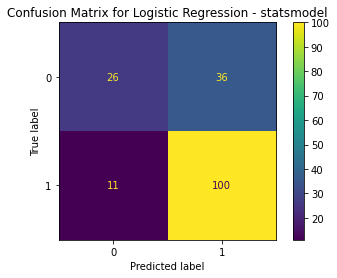

In [9]:
cm = confusion_matrix(y, np.where(log_reg.predict(X) > 0.5, 1, 0), labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()
plt.title("Confusion Matrix for Logistic Regression - statsmodel")
plt.show()

In [10]:
#Log-likelihood ratio
print("Log-likelihood ratio :",log_reg.llr)

Log-likelihood ratio : 24.806967426587676
